In [1]:
import itertools
import numpy as np
import pandas as pd
import concurrent.futures
import numpy as np
import math
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, ConfusionMatrixDisplay, auc, roc_auc_score, f1_score
from sklearn import datasets
from statistics import mean
import includes.model as mod
import pandas as pd
from joblib import dump, load
from includes.config import Config;
import includes.model_functions as mf
import time
from itertools import combinations
import random
from graphviz import Digraph
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from datetime import datetime 
import os
import argparse
from itertools import count
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder

# Prepare data

Data must have: 
- target class = Y
- features all non categorical

In [25]:
# Get data ready 
config = Config("testing_datasets")
pen_based_recognition_of_handwritten_digits = fetch_ucirepo(id=81) 
filename = "pen_based_classifier"
model_types = ['LogisticRegression']
df = pen_based_recognition_of_handwritten_digits.data.original
# print(df['Class'])
# ecoli_data = ecoli_data.head(1000)
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/handwritten_digits.csv")
df
# df = df.head(1000)
# df['Y'], unique_strings = pd.factorize(df['class'])
# ecoli_data['Sequence_numerical'], unique_seq_strings = pd.factorize(ecoli_data['Sequence'])
# df.drop(['class', 'Sequence'], axis=1, inplace=True)
# ecoli_data['Y'] = ecoli_data['encoded_Y']
# print(df)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Y
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [20]:
# beans data
# config = Config("testing_datasets")
df = fetch_ucirepo(id=602)
filename = "pen_based_classifier"
model_types = ['LogisticRegression']
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
df

In [7]:
# letter recognition
config = Config("letter_rec")
letter_recognition = fetch_ucirepo(id=59) 
letter_recognition_data = letter_recognition.data.original
filename = "letter_recognition"
# model_types = ['randomForest', 'LogisticRegression', 'xgboost']
model_types = ['LogisticRegression']
transform_label = LabelEncoder()
# letter_recognition_data['lettr'] = transform_label.fit_transform(letter_recognition_data['lettr'])
df = letter_recognition_data
df.rename({'lettr': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/letter_recognition.csv")
# ecoli_data = abalone.data.original
df.to_csv("data/letter_recognition.csv")

In [24]:
# statlog
statlog_shuttle = fetch_ucirepo(id=148) 
df = statlog_shuttle.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.groupby('Y').size().reset_index(name='counts')
df.to_csv("data/statlog_data.csv")
# df


In [22]:
# Room Occupany
df = fetch_ucirepo(id=864) 
df = df.data.original
df.rename({'Room_Occupancy_Count': 'Y'}, axis=1, inplace=True)
# df
df = mf.one_hot_encode(df, "Date")
df = mf.one_hot_encode(df, "Time")
df.to_csv("data/room_occupancy_data.csv")

In [2]:
config = Config("yeast")
filename = "yeast"
yeast = fetch_ucirepo(id=110) 
df = yeast.data.original
transform_label = LabelEncoder()
df.rename({'localization_site': 'Y'}, axis=1, inplace=True)
# pre_transform_categories = tuple(df['Y'].unique())
# df['Y'] = transform_label.fit_transform(df['Y'])
# mapped_categories = dict(zip(pre_transform_categories, transform_label.transform(pre_transform_categories)))
# config.log.info(f"mapped categories: {mapped_categories}")
df = mf.one_hot_encode(df, "Sequence_Name")
print(df)

       mcg   gvh   alm   mit  erl  pox   vac   nuc    Y  \
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT   
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT   
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT   
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC   
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT   
...    ...   ...   ...   ...  ...  ...   ...   ...  ...   
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2   
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC   
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2   
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC   
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT   

      Sequence_Name_6P2K_YEAST  ...  Sequence_Name_YOX1_YEAST  \
0                        False  ...                     False   
1                        False  ...                     False   
2                        False  ...                     False   
3                        False 

In [23]:
pre_transform_categories = tuple(df['Y'].unique())
all_integers = all(isinstance(x, int) or str(x).isdigit() for x in pre_transform_categories)
if not all_integers:
    transform_label = LabelEncoder()
    config.log.info("Types are categorical so need to map them to integers.")
    pre_transform_categories = tuple(df['Y'].unique())
    df['Y'] = transform_label.fit_transform(df['Y'])
    mapped_categories = dict(zip(pre_transform_categories, transform_label.transform(pre_transform_categories)))
    config.log.info(f"mapped categories: {mapped_categories}")

{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 15:16:22", "level": "INFO", "function": "<module>", "message": "Types are categorical so nee

In [13]:
letter_recognition = fetch_ucirepo(id=59) 
letter_recognition_data = letter_recognition.data.original

      lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T      2      8      3     5      1      8     13      0      6   
1         I      5     12      3     7      2     10      5      5      4   
2         D      4     11      6     8      6     10      6      2      6   
3         N      7     11      6     6      3      5      9      4      6   
4         G      2      1      3     1      1      8      6      6      6   
...     ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995     D      2      2      3     3      2      7      7      7      6   
19996     C      7     10      8     8      4      4      8      6      9   
19997     T      6      9      6     7      5      6     11      3      7   
19998     S      2      3      4     2      1      8      7      2      6   
19999     A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0          6     1

In [17]:
le = LabelEncoder()
letter_recognition_data['lettr'] = le.fit_transform(letter_recognition_data['lettr'])
# label_encoders[column] = le
letter_recognition_data['lettr']

0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: lettr, Length: 20000, dtype: int32

In [18]:
letter_recognition_data['lettr'] = le.inverse_transform(letter_recognition_data['lettr'])

In [4]:
# Get data ready 
config = Config("testing_datasets")
filename = "abalone_classifier"
abalone = pd.read_csv("data/abalone.csv")
abalone.rename({'Rings': 'Y'}, axis=1, inplace=True)
df = mf.one_hot_encode(abalone, "Sex")
print(df)

      Unnamed: 0  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0              0   0.455     0.365   0.095        0.5140          0.2245   
1              1   0.350     0.265   0.090        0.2255          0.0995   
2              2   0.530     0.420   0.135        0.6770          0.2565   
3              3   0.440     0.365   0.125        0.5160          0.2155   
4              4   0.330     0.255   0.080        0.2050          0.0895   
...          ...     ...       ...     ...           ...             ...   
4172        4172   0.565     0.450   0.165        0.8870          0.3700   
4173        4173   0.590     0.440   0.135        0.9660          0.4390   
4174        4174   0.600     0.475   0.205        1.1760          0.5255   
4175        4175   0.625     0.485   0.150        1.0945          0.5310   
4176        4176   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight   Y  Sex_F  Sex_I  Sex_M  
0             0.1010     

In [5]:
grouped_df = df.groupby('Y').size().reset_index(name='counts')
# df = df.loc[(df['Y'] > 4) & (df['Y'] < 17)]
# grouped_df = df.groupby('Y').size().reset_index(name='counts')
grouped_df

,Y,counts
0,0,463
1,1,5
2,2,35
3,3,44
4,4,51
5,5,163
6,6,244
7,7,429
8,8,20
9,9,30


In [9]:
df.to_csv("data/abalone_culled.csv")

# Run my model

{"timestamp": "2024-07-31 16:13:58", "level": "INFO", "function": "map_categorical_target", "message": "Types are categorical so need to map them to integers."}
{"timestamp": "2024-07-31 16:13:58", "level": "INFO", "function": "map_categorical_target", "message": "mapped categories: {'MIT': 6, 'NUC': 7, 'CYT': 0, 'ME1': 3, 'EXC': 2, 'ME2': 4, 'ME3': 5, 'VAC': 9, 'POX': 8, 'ERL': 1}"}
{"timestamp": "2024-07-31 16:13:58", "level": "INFO", "function": "stepwise_tree_finder", "message": "Finding stepwise layer for LogisticRegression with categories: (6, 7, 0, 3, 2, 4, 5, 9, 8, 1)"}
c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
{"timestamp": "2024-07-31 16:14:19", "level": "INFO", "function": "stepwise_tree_finder", "message": "Stepwise layer for LogisticRegression: ((1,), (6, 7, 0, 3, 2, 4, 5, 9, 8)) is 0.99579832"

              precision    recall  f1-score   support

         CYT       0.64      0.37      0.47        93
         ERL       0.50      1.00      0.67         1
         EXC       0.11      0.14      0.12         7
         ME1       0.36      1.00      0.53         9
         ME2       0.00      0.00      0.00        10
         ME3       0.45      0.78      0.57        32
         MIT       0.48      0.47      0.47        49
         NUC       0.72      0.42      0.53        86
         POX       0.60      0.75      0.67         4
         VAC       0.00      0.00      0.00         6

    accuracy                           0.44       297
   macro avg       0.39      0.49      0.40       297
weighted avg       0.56      0.44      0.47       297



{"timestamp": "2024-07-31 16:15:44", "level": "INFO", "function": "graph_model", "message": "Model diagram saved here: models/plot_20240731_161543_yeast.png"}


<Figure size 640x360 with 0 Axes>

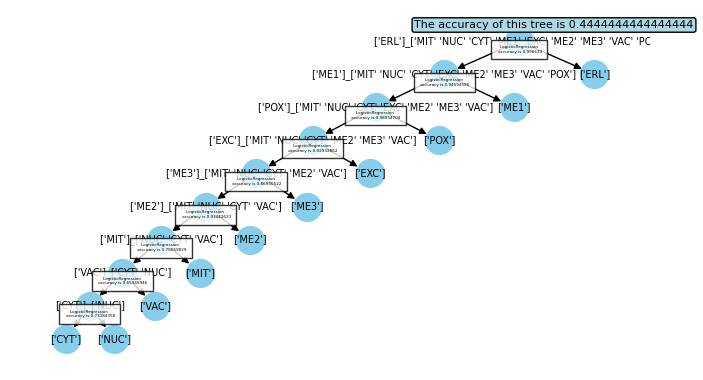

In [3]:
# Run my ML model
if not transform_label:
    transform_label = None
transform_label = mf.map_categorical_target(config, df)
model_types = ['randomForest', 'LogisticRegression']
model_types = ['LogisticRegression']
X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], stratify=df['Y'], test_size=0.2, random_state=43)
score_type = 'accuracy'
# categories = tuple((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
categories = tuple(df['Y'].unique())

best_tree = mf.stepwise_tree_finder(config, categories, X_train, X_test, {}, model_types=model_types, score_type=score_type)
config.log.info('Finished stepwise tree finder.')
model_strucs = list(best_tree.keys())
tree_types = list(best_tree.values())
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label)

{"timestamp": "2024-07-30 23:47:24", "level": "INFO", "function": "graph_model", "message": "Plotting tree: <includes.model.tree_model object at 0x000001E57A711180>"}
{"timestamp": "2024-07-30 23:47:26", "level": "INFO", "function": "graph_model", "message": "Model diagram saved here: models/plot_20240730_234725_yeast.png"}


<Figure size 640x360 with 0 Axes>

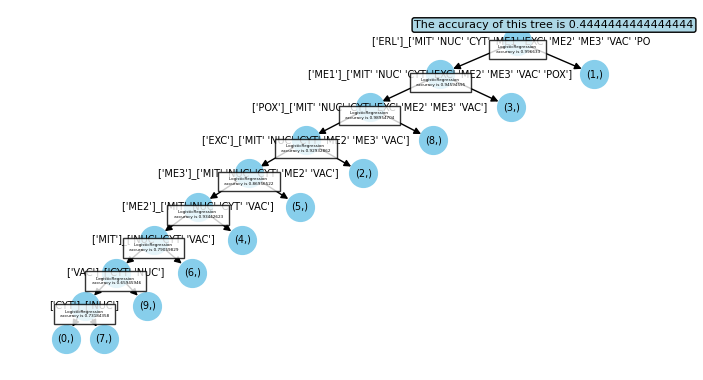

In [4]:
# best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label) 
filename = "yeast"
mf.graph_model(config, best_trained_model, filename, transform_label)
    

In [41]:
result = '_'.join(
    f"({','.join(transform_label.inverse_transform(list(map(int, x.strip('()').split(',')))))})"
    for x in '(16, 6)_(7, 14)'.split('_')
)

In [42]:
result

'(Q,G)_(H,O)'

In [38]:
result = [list(map(int, x.strip('()').split(','))) for x in '(16, 6)_(7, 14)'.split('_')]
print(result)
l = []
for i in result:
    (transform_label.inverse_transform(i))
# l = [list(i) for i in x]
l

[[16, 6], [7, 14]]


[array(['Q', 'G'], dtype=object), array(['H', 'O'], dtype=object)]

In [15]:
print(best_tree)
model_strucs = list(best_tree.keys())
tree_types = list(best_tree.values())
score_type = 'accuracy'
best_trained_model = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, target_conversion = transform_label)

# built_mods = mf.build_single_models(config, best_tree, X_train, score_type=score_type, train_type=tree_types)
# print(built_mods)
# mf.test_single_models(built_mods, X_test)

# mf.graph_model(config, best_trained_model, filename)

{((12,), (19, 8, 3, 13, 6, 18, 1, 0, 9, 23, 14, 17, 5, 2, 7, 22, 11, 15, 4, 21, 24, 16, 20, 10, 25)): 'LogisticRegression', ((0,), (19, 8, 3, 13, 6, 18, 1, 9, 23, 14, 17, 5, 2, 7, 22, 11, 15, 4, 21, 24, 16, 20, 10, 25)): 'LogisticRegression', ((22,), (19, 8, 3, 13, 6, 18, 1, 9, 23, 14, 17, 5, 2, 7, 11, 15, 4, 21, 24, 16, 20, 10, 25)): 'LogisticRegression', ((21,), (19, 8, 3, 13, 6, 18, 1, 9, 23, 14, 17, 5, 2, 7, 11, 15, 4, 24, 16, 20, 10, 25)): 'LogisticRegression', ((13,), (19, 8, 3, 6, 18, 1, 9, 23, 14, 17, 5, 2, 7, 11, 15, 4, 24, 16, 20, 10, 25)): 'LogisticRegression', ((8,), (19, 3, 6, 18, 1, 9, 23, 14, 17, 5, 2, 7, 11, 15, 4, 24, 16, 20, 10, 25)): 'LogisticRegression', ((9,), (19, 3, 6, 18, 1, 23, 14, 17, 5, 2, 7, 11, 15, 4, 24, 16, 20, 10, 25)): 'LogisticRegression', ((24,), (19, 3, 6, 18, 1, 23, 14, 17, 5, 2, 7, 11, 15, 4, 16, 20, 10, 25)): 'LogisticRegression', ((19,), (3, 6, 18, 1, 23, 14, 17, 5, 2, 7, 11, 15, 4, 16, 20, 10, 25)): 'LogisticRegression', ((15, 5), (3, 6, 18, 1, 

{"timestamp": "2024-07-29 22:14:48", "level": "INFO", "function": "build_best_tree", "message": "Best models are [<includes.model.single_model object at 0x00000240288C17E0>, <includes.model.single_model object at 0x0000024005092140>, <includes.model.single_model object at 0x00000240051C64A0>, <includes.model.single_model object at 0x00000240051C5B40>, <includes.model.single_model object at 0x000002402C031510>, <includes.model.single_model object at 0x000002402C032B30>, <includes.model.single_model object at 0x000002402C0311E0>, <includes.model.single_model object at 0x000002402C032AA0>, <includes.model.single_model object at 0x000002402C031300>, <includes.model.single_model object at 0x00000240051C64D0>, <includes.model.single_model object at 0x00000240288C0EE0>, <includes.model.single_model object at 0x00000240288C0610>, <includes.model.single_model object at 0x00000240288C04F0>, <includes.model.single_model object at 0x000002402C03F400>, <includes.model.single_model object at 0x00000

              precision    recall  f1-score   support

           A       0.89      1.00      0.94         8
           B       1.00      0.67      0.80         9
           C       1.00      0.43      0.60         7
           D       1.00      0.67      0.80         9
           E       1.00      0.71      0.83         7
           F       0.25      0.14      0.18         7
           G       0.62      0.71      0.67         7
           H       0.60      0.43      0.50         7
           I       0.21      0.86      0.34         7
           J       0.28      0.70      0.40        10
           K       0.17      0.12      0.14         8
           L       1.00      0.57      0.73         7
           M       0.92      1.00      0.96        11
           N       1.00      0.75      0.86         8
           O       1.00      0.29      0.44         7
           P       0.56      0.56      0.56         9
           Q       0.33      0.17      0.22         6
           R       0.33    

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 407, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\maxdi\\OneDrive\\Documents\\uni_honours\\logs\\letter_rec_2024-07-29.log' -> 'c:\\Users\\maxdi\\OneDrive\\Documents\\uni_honours\\logs\\letter_rec_2024-07-29.log.2024-07-29'
Call stack:
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Pytho

<Figure size 640x360 with 0 Axes>

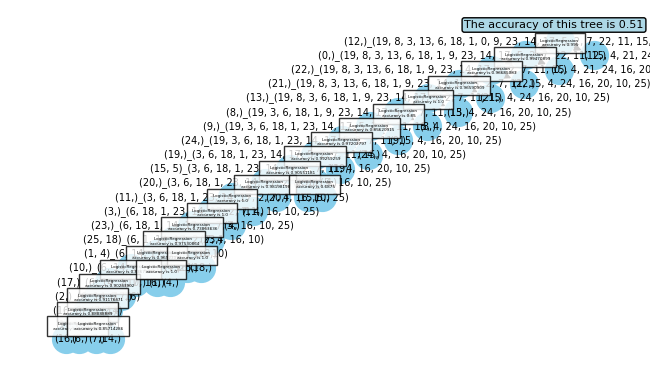

In [16]:
mf.graph_model(config, best_trained_model, filename)

# Run with Other Models

In [4]:
# Run with Other Models
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        96
           2       0.00      0.00      0.00         8
           3       0.71      0.62      0.67         8
           4       0.00      0.00      0.00         6
           5       0.92      0.65      0.76        34
           6       0.67      0.56      0.61        52
           7       0.53      0.54      0.54        85
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         6

    accuracy                           0.58       297
   macro avg       0.48      0.45      0.46       297
weighted avg       0.56      0.58      0.56       297



c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,